# ML Challenge: Cross-Validation Framework

## Challenge Description
 
**Objective**: Create a cross-validation framework to compare different ML models on a classification task.

**Skills practiced**:
- Model selection
- Cross-validation
- Performance evaluation
- Results visualization

## Challenge Requirements

1. Compare at least 5 different classification models
2. Implement repeated stratified k-fold cross-validation
3. Evaluate using ROC AUC score
4. Create a sorted summary table of model performance
5. Visualize the results


In [2]:
# Import data libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic classification data
from sklearn.datasets import make_classification

# EXECUTE THIS CELL
X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=6, 
    n_redundant=4, 
    n_classes=2, 
    random_state=42
)

## Starter Code

*This section gives you a starting point. Complete the code where indicated.*

## STEP 1: Import the required models
*HINT: Consider logistic regression, k-NN, decision tree,  random forest, extratrees, XGBoost, LightGBM, Catboost, SVM, and naive Bayes*


In [ ]:
# code here

In [4]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

## STEP 2: Initialize the models
*HINT: Store models in a dictionary (`models`) with appropriate names*

In [9]:
# code here

In [20]:

models = {}
models["LR"] = LogisticRegression(n_jobs=-1, random_state=42)
models["KNN"] = KNeighborsClassifier(n_jobs=-1)
models["DTC"] = DecisionTreeClassifier(random_state=42)
models["RF"] = RandomForestClassifier(random_state=42, n_jobs=-1)
models["ETC"] = ExtraTreesClassifier(n_jobs=-1, random_state=42)
models["XGB"] = XGBClassifier(random_state=42, device="cuda")
models["LGBM"] = LGBMClassifier(random_state=42, device="gpu", verbose=-1)
models["CBoost"] = CatBoostClassifier(devices="cuda", random_state=42, verbose=0)
models["SVC"] = SVC(random_state=42)
models["GaussianNB"] = GaussianNB()

## STEP 3: Set up cross-validation
*HINT: Use RepeatedStratifiedKFold with 10 folds and 2 repetitions*

In [14]:
# code here

In [15]:

from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=2, random_state=42)

## STEP 4: Perform cross-validation and collect results
*HINT: Use ROC as valuation metric and store the mean and std scores in `results` dictionary*

In [ ]:
# code here

In [21]:

from sklearn.model_selection import cross_val_score

results = {}
for name, model in models.items():
    scores = cross_val_score(
        estimator=model,
        X=X,
        y=y,
        scoring="roc_auc",
        cv=rskf,
        n_jobs=-1
    )
    mean_scores = np.mean(scores)
    std_scores = np.std(scores)
    results[name] = {
        "mean_roc" : mean_scores,
        "std_roc" : std_scores
    }

/home/ma/miniforge3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:52:24] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
/home/ma/miniforge3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:52:24] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set 

## STEP 5: Create and display a sorted summary table
*HINT: Convert results to DataFrame and sort by performance*

In [22]:
# code here

In [27]:

results_df = pd.DataFrame.from_dict(results, columns=["mean_roc", "std_roc"], orient="index")
results_df.index.name = "models"
results_df = results_df.sort_values(by="mean_roc", ascending=False)
results_df

,mean_roc,std_roc
models,,
ETC,0.979800,0.011900
CBoost,0.977919,0.014058
LGBM,0.973359,0.012491
RF,0.971659,0.015322
XGB,0.969879,0.015027
KNN,0.969419,0.013379
SVC,0.966319,0.017794
GaussianNB,0.907375,0.033350
LR,0.893455,0.029632


## STEP 6: Visualize the results
*HINT: Create a bar chart with error bars representing standard deviation*

In [ ]:
# code here

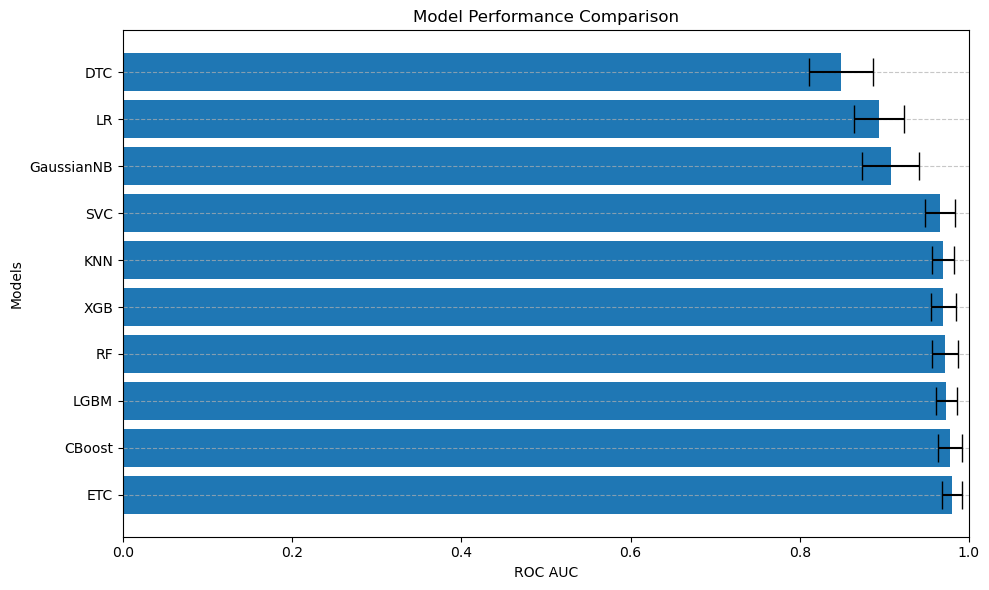

In [37]:

plt.figure(figsize=(10,6))
plt.barh(results_df.index, results_df["mean_roc"], xerr=results_df["std_roc"], capsize=10)
plt.xlabel("ROC AUC")
plt.ylabel("Models")
plt.title("Model Performance Comparison")
plt.xlim(0., 1.0)
plt.grid(axis="y", linestyle=("--"), alpha=0.7)
plt.tight_layout()
plt.show()